# A2-bank.csv

### Read data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the csv
df = pd.read_csv('A2-bank\\bank-additional-full.csv', sep=';', header=0, index_col=False)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Preprocess

In [7]:

# Drop the duration and day of the week columns
df = df.drop(['duration', 'day_of_week'], axis=1)

# Convert the month column to numerical values
df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                                   'nov', 'dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12])

# Drop rows which contain unknown values
df = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['education'] != 'unknown') &
        (df['default'] != 'unknown') & (df['housing'] != 'unknown') & (df['loan'] != 'unknown') &
        (df['contact'] != 'unknown') & (df['poutcome'] != 'unknown')]

# Convert the marrital and poutcome columns to numerical values
df['marital'] = df['marital'].replace(['married', 'single', 'divorced'], [1, 2, 3])
df['poutcome'] = df['poutcome'].replace(['failure', 'nonexistent', 'success'], [1, 2, 3])

# Convert default, contact, housing, y and loan to 0 and 1
df['default'] = df['default'].replace(['no', 'yes'], [0, 1])
df['housing'] = df['housing'].replace(['no', 'yes'], [0, 1])
df['loan'] = df['loan'].replace(['no', 'yes'], [0, 1])
df['contact'] = df['contact'].replace(['cellular', 'telephone'], [0, 1])
df['y'] = df['y'].replace(['no', 'yes'], [0, 1])


# Convert the education column to numerical values
df['education'] = df['education'].replace(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                                           'professional.course', 'university.degree'], [0, 1, 2, 3, 4, 5, 6])

# Convert the job column to numerical values
df['job'] = df['job'].replace(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
                               'self-employed', 'services', 'student', 'technician', 'unemployed'], [0, 1, 2, 3, 4,
                                                                                                      5, 6, 7, 8,
                                                                                                      9, 10])


df.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4,0,1,0,1,5,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4,0,0,1,1,5,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,5,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


### Normalization

In [8]:
# Normalize all the columns but the y column from 0 to 1
for column in df:
    if column != 'y':
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


df.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.500000,0.3,0.0,0.166667,0.0,0.0,0.0,1.0,0.222222,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.256410,0.7,0.0,0.666667,0.0,1.0,0.0,1.0,0.222222,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.294872,0.0,0.0,0.333333,0.0,0.0,0.0,1.0,0.222222,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.500000,0.7,0.0,0.666667,0.0,0.0,1.0,1.0,0.222222,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0
6,0.538462,0.0,0.0,0.833333,0.0,0.0,0.0,1.0,0.222222,0.0,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0


### Output Train and Test

In [9]:
# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into 80% training and 20% testing
train = df[:int(len(df)*0.8)]
test = df[int(len(df)*0.8):]

# Save the training and testing data
df.to_csv('A2-bank\\full.csv', sep=';', index=False)
train.to_csv('A2-bank\\train.csv', sep=';', index=False)
test.to_csv('A2-bank\\test.csv', sep=';', index=False)

### Plot the data

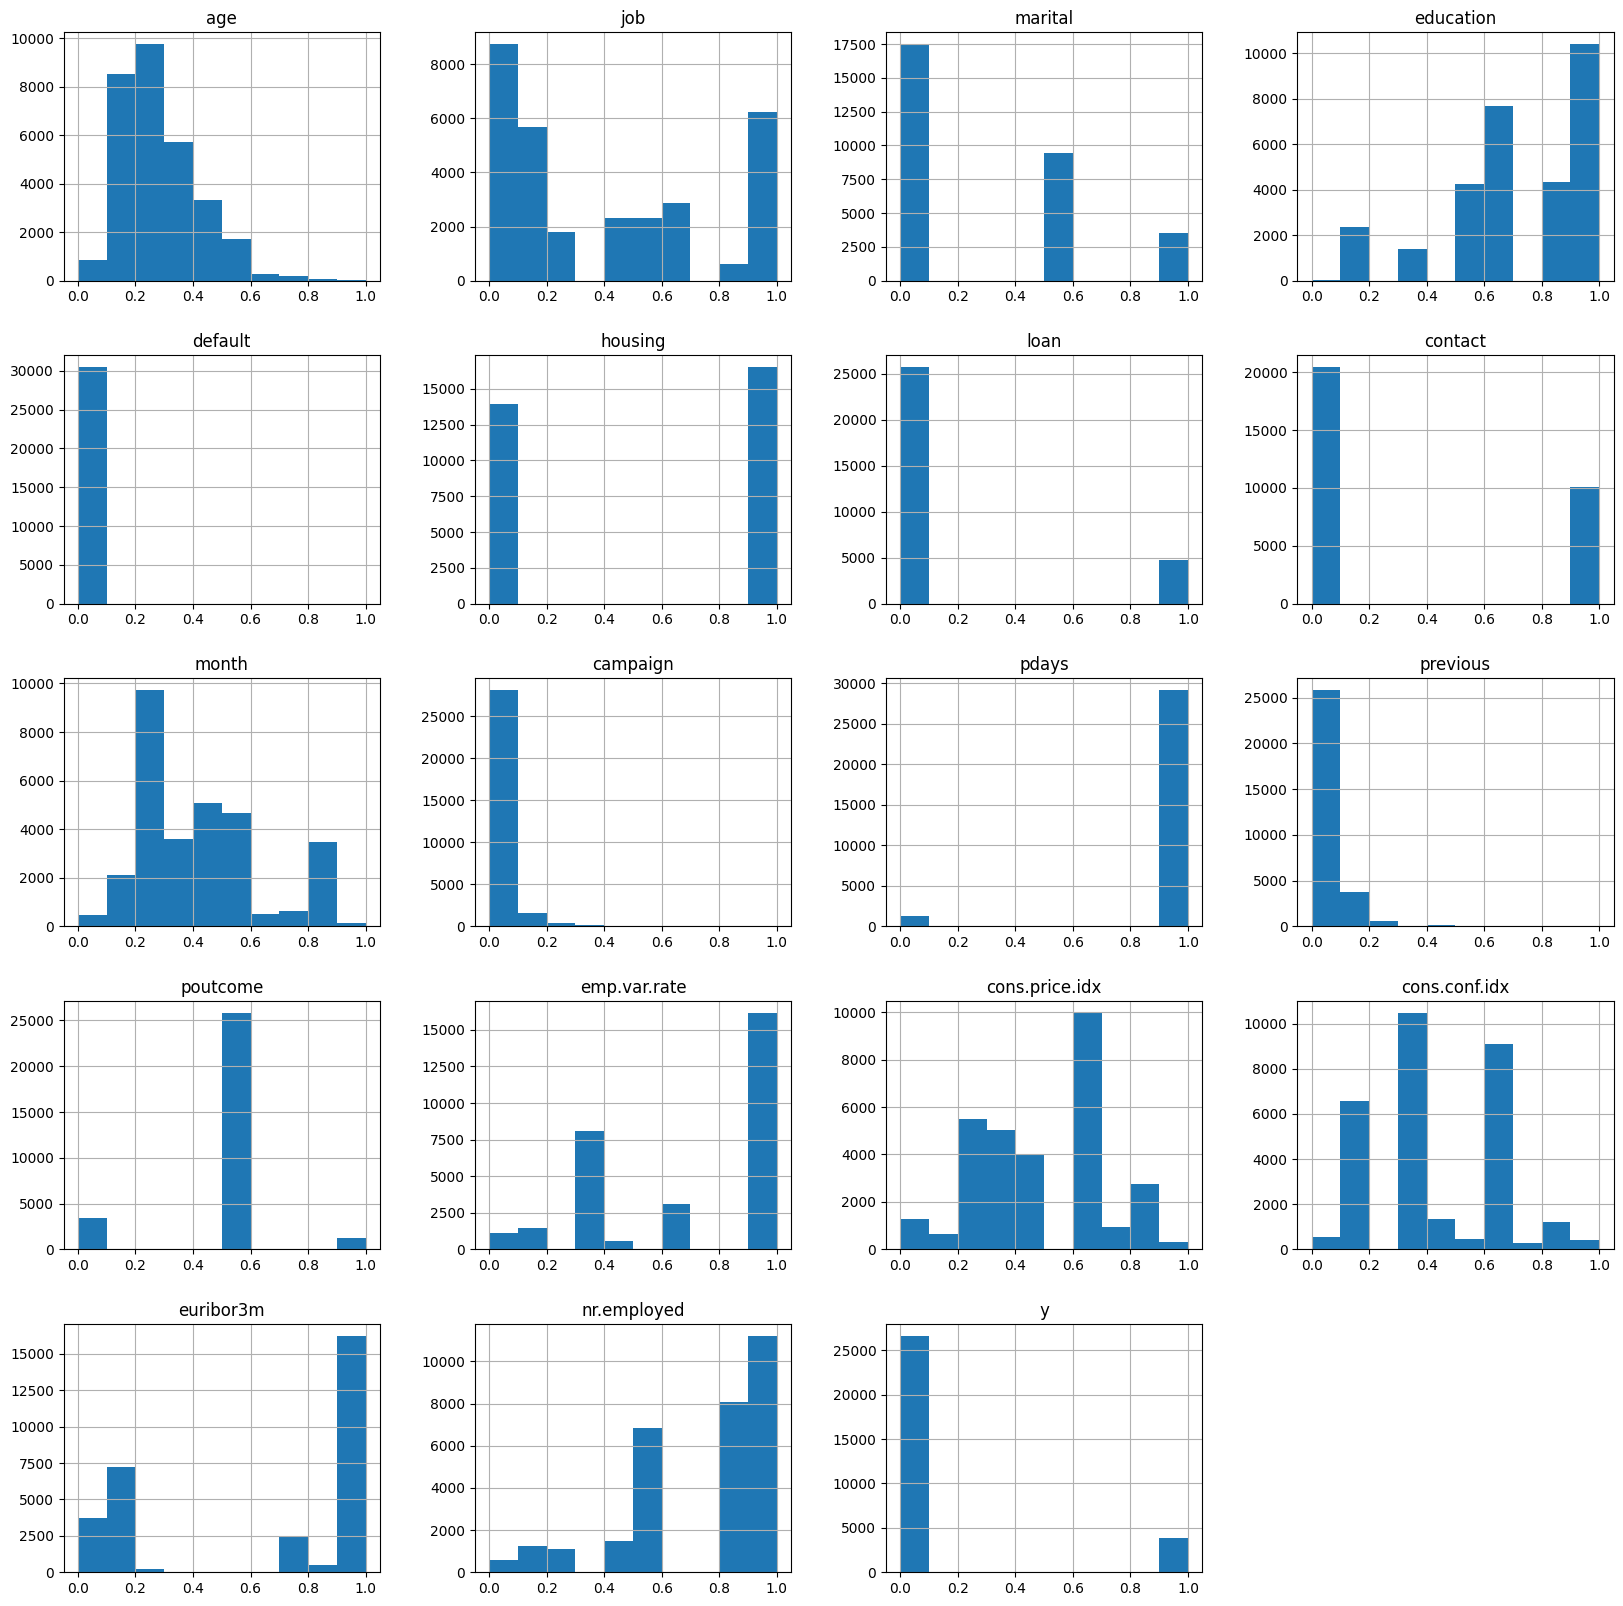

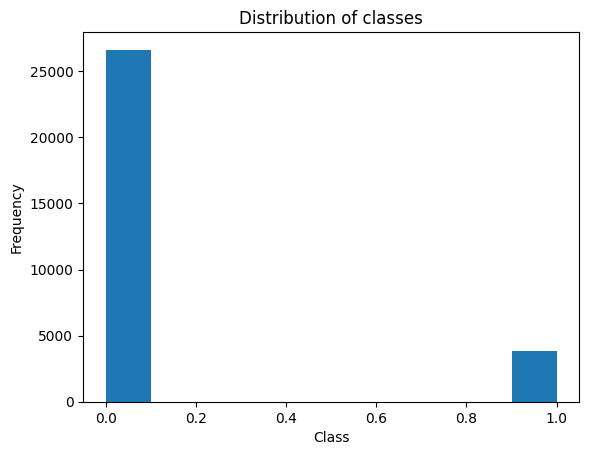

In [10]:
# Plot the distribution of all the columns
df.hist(df.columns, figsize=(20, 20))
plt.show()

# Plot the distribution of the classes
plt.hist(df['y'])
plt.title('Distribution of classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
